In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json, os, re
from collections import defaultdict
from itertools import islice
from wordcloud import WordCloud

In [20]:
playlists = [] # list of dictionaries
with open('playlist_data.json', 'r') as file:
    for line in file:
        data = json.loads(line)
        playlists.append(data)

In [30]:
# get the total number of playlists
total = len(playlists)
print("Total number of playlists: ", total)

# get the range of playlist length
lengths = [len(playlist['tracks']) for playlist in playlists]
print("Range of playlist length: ", min(lengths), max(lengths))

# get the average playlist length
avg_length = sum(lengths) / total
print("Average playlist length: ", avg_length)

# print the mode of playlist length
mode_length = max(set(lengths), key=lengths.count)
print("Mode of playlist length: ", mode_length)

# get the most common words in playlist names
words = defaultdict(int)
for playlist in playlists:
    name = playlist['name']
    for word in name.split():
        words[word] += 1

# sort the words by frequency
sorted_words = sorted(words.items(), key=lambda x: x[1], reverse=True)

# print the 50 most common words
top_50_words = sorted_words[:50]
print("Top 50 words:\n\n ", top_50_words)

# get the frequency of the top 50 words
top_50_freq = [word[1] for word in top_50_words]

# get the top 50 track names
tracks = defaultdict(int)
for playlist in playlists:
    for track in playlist['tracks']:
        tracks[track] += 1

# sort the tracks by frequency
sorted_tracks = sorted(tracks.items(), key=lambda x: x[1], reverse=True)

# print the 50 most common tracks
top_50_tracks = sorted_tracks[:50]
print("Top 50 tracks:\n\n ", top_50_tracks)

# get the frequency of the top 50 tracks
top_50_tracks_freq = [track[1] for track in top_50_tracks]

Total number of playlists:  1000000
Range of playlist length:  5 376
Average playlist length:  66.346428
Mode of playlist length:  20


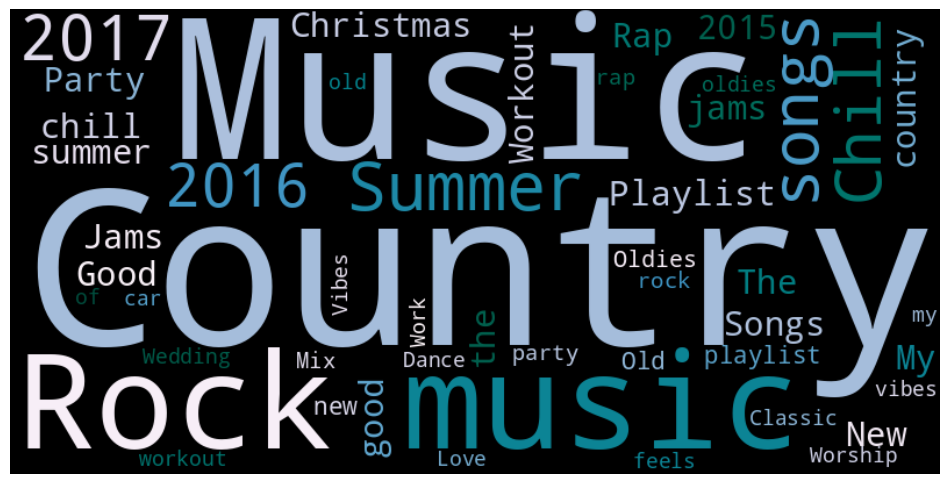

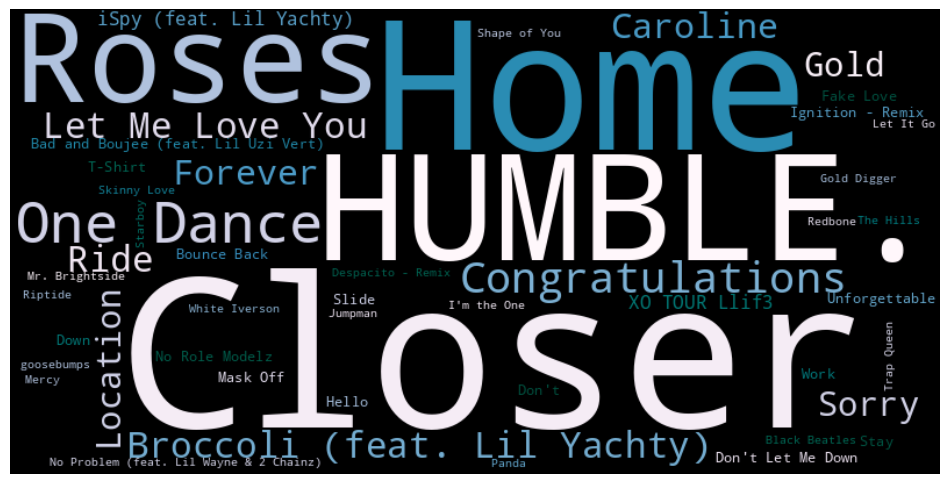

In [27]:
# create a word cloud of the top 50 words
wordcloud = WordCloud(width=800, height=400, colormap='PuBuGn_r')
wordcloud.generate_from_frequencies(dict(top_50_words))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# create a word cloud of the top 50 tracks
wordcloud = WordCloud(width=800, height=400, colormap='PuBuGn_r')
wordcloud.generate_from_frequencies(dict(top_50_tracks))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# open cleanedFunction1playlists.pickle (this file contains the cleaned text playlists)
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('playlist_cleaned_dict.pickle', 'rb') as handle:
    playlist_cleaned_dict = pickle.load(handle)

# print the first 50 keys (playlist names)
print(list(playlist_cleaned_dict.keys())[:50])

In [ ]:
# print the new number of playlists
print(len(list(playlist_cleaned_dict.keys())))

# print the range of playlist lengths
print(min([len(playlist_cleaned_dict[playlist]) for playlist in playlist_cleaned_dict.keys()]))
print(max([len(playlist_cleaned_dict[playlist]) for playlist in playlist_cleaned_dict.keys()]))

# print the length of each playlist sorted
print(sorted([len(playlist_cleaned_dict[playlist]) for playlist in playlist_cleaned_dict.keys()]))

# print the mode of the playlist lengths
print(np.bincount([len(playlist_cleaned_dict[playlist]) for playlist in playlist_cleaned_dict.keys()]).argmax())

#print the average playlist length
print(np.mean([len(playlist_cleaned_dict[playlist]) for playlist in playlist_cleaned_dict.keys()]))

# # print the total number of songs
print(sum([len(playlist_cleaned_dict[playlist]) for playlist in playlist_cleaned_dict.keys()]))